In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import lightgbm as lgb
import joblib

# Open processed data

In [13]:
instrument = "BTC-PERPETUAL"
interval = 400
path = f"/Users/joeybesseling/Documents/Programmeren/Projects/Data/PROCESSED_{instrument}/"
features = pd.read_parquet(path + f"TEST_processed_features_{instrument}_{interval}s.parquet")
targets = pd.read_parquet(path + f"TEST_processed_targets_{instrument}_{interval}s.parquet")["targets"]

features = features.resample("400s").last()
targets = targets.resample("400s").last()
old_cols = features.columns
cols = []
for i in range(features.shape[1]):
    cols.append(f"{i}")
features.columns = cols

In [14]:
features

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
timestamp,,,,,,,,,,,,,,,,,,,,,
2022-07-23 22:20:00,0.264292,2.320236,1.054103,2.604819,-0.160428,1.460910,1.342077,1.575365,22.811095,143.233459,...,2.296555,1.861607,19.738567,110.258410,20.418600,113.512275,14.693943,79.537696,18.524179,107.728034
2022-07-23 22:26:40,-0.397974,2.896207,-1.946833,1.500141,-0.199546,1.886565,0.232358,2.005694,28.629035,203.192897,...,-0.077002,1.637292,22.188396,145.146367,15.884926,99.361778,20.774394,134.159247,15.875548,105.533243
2022-07-23 22:33:20,7.369964,4.175490,0.356057,2.530632,-0.549516,3.062396,6.109198,2.301772,41.552137,282.361842,...,-0.398443,1.485041,21.056977,137.115831,14.478648,86.592921,17.355824,115.415060,14.764683,92.320930
2022-07-23 22:40:00,4.783655,3.498758,4.574443,1.276302,7.971654,1.901516,5.332184,1.797781,34.490647,223.033103,...,-2.457240,2.105492,22.765019,94.809536,13.879236,73.135995,20.067377,124.251495,20.929314,140.803864
2022-07-23 22:46:40,-1.246190,1.877027,-5.490231,1.447136,0.099245,1.332523,2.305239,1.229075,18.676274,95.516554,...,1.977228,1.306845,21.723497,127.116304,13.489048,72.686138,15.072846,82.898233,12.816425,76.610394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-05 10:13:20,0.181030,1.573534,0.830953,0.736829,-2.073461,0.899522,0.407346,1.035928,15.639033,104.309626,...,-1.037876,1.808254,20.599105,103.638344,9.591769,50.915799,14.209431,80.530202,17.992203,121.487733
2022-08-05 10:20:00,-0.696808,3.158348,0.075757,1.121954,-1.553698,1.013330,0.365649,1.331202,31.425233,180.808535,...,1.192211,1.004141,13.852511,68.191929,7.904423,48.188057,7.163266,50.381321,9.929876,62.262848
2022-08-05 10:26:40,0.050977,1.609753,-0.219669,1.096328,-0.816466,1.251113,0.245152,1.219164,16.016831,64.232808,...,4.330023,1.147586,17.082273,90.819357,13.423615,82.714061,11.526677,80.639298,10.669820,75.648715


In [15]:
old_cols

Index(['1_('rwap', 'nansum')', '1_('rwap', 'nanstd')', '1_('rwap2', 'nansum')',
       '1_('rwap2', 'nanstd')', '1_('rwap3', 'nansum')',
       '1_('rwap3', 'nanstd')', '1_('rwap4', 'nansum')',
       '1_('rwap4', 'nanstd')', '1_('wap', 'series_realized_volatility')',
       '1_('wap', 'series_realized_absolute_vol')',
       '1_('wap2', 'series_realized_volatility')',
       '1_('wap2', 'series_realized_absolute_vol')',
       '1_('wap3', 'series_realized_volatility')',
       '1_('wap3', 'series_realized_absolute_vol')',
       '1_('wap4', 'series_realized_volatility')',
       '1_('wap4', 'series_realized_absolute_vol')', '2_('rwap', 'nansum')',
       '2_('rwap', 'nanstd')', '2_('rwap2', 'nansum')',
       '2_('rwap2', 'nanstd')', '2_('rwap3', 'nansum')',
       '2_('rwap3', 'nanstd')', '2_('rwap4', 'nansum')',
       '2_('rwap4', 'nanstd')', '2_('wap', 'series_realized_volatility')',
       '2_('wap', 'series_realized_absolute_vol')',
       '2_('wap2', 'series_realized_volatility

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import lightgbm as lgb

/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


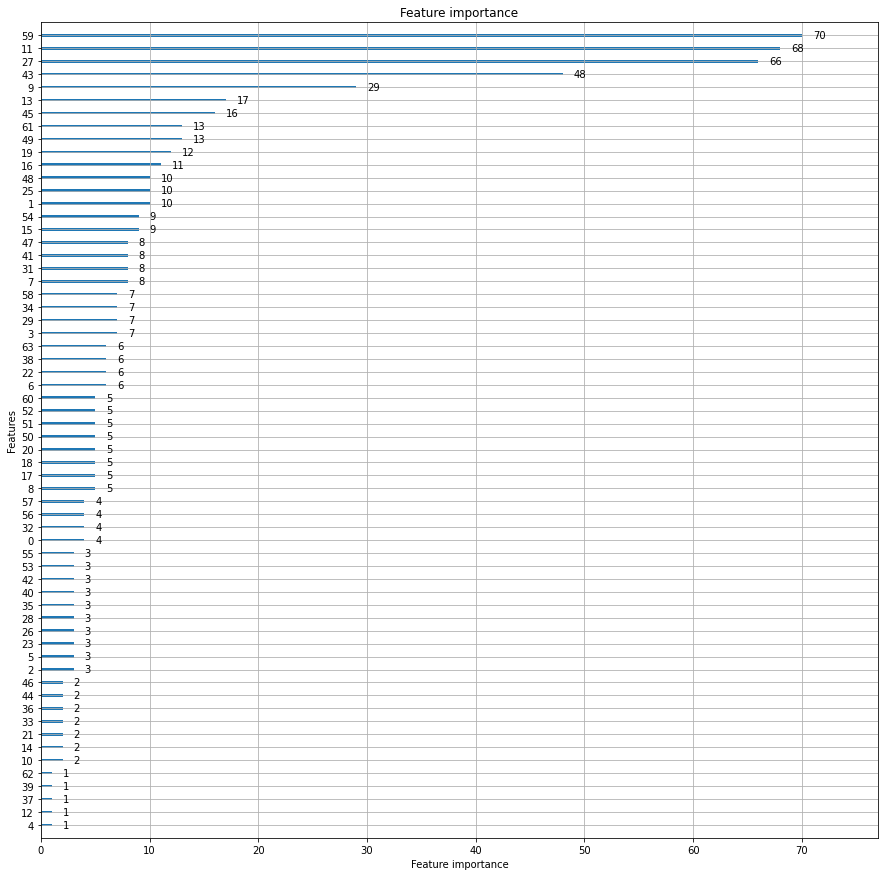

[[ 1. nan]
 [nan nan]]


In [26]:
class ModelResearch():
    def __init__(self,features, targets, random_state = 2):
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(features, targets, train_size=.90, shuffle=False, random_state = random_state)

    def fit_model(self, plot = False, learning_rate = .01, num_iterations = 1000):
        hyperparams = {
            "boosting_type": "gbdt",
            "learning_rate": learning_rate,
            "num_iterations": num_iterations,
            # "objective": "l2",
            # "max_depth": 1,
            "min_data_per_group": 1, 
            # "bagging_fraction": .8,
            "drop_rate": .0,
        }
        self.model = lgb.LGBMRegressor(**hyperparams)
        self.model.fit(self.X_train, self.y_train)

        if plot:
            fig, axs = plt.subplots(1,1, figsize = (15,15))
            lgb.plot_importance(self.model, ax = axs)
            plt.show()

    def predict(self, train = False):
        if train:
            pred = self.model.predict(self.X_train)
            true = self.y_train
        else:
            pred = self.model.predict(self.X_test)
            true = self.y_test
        return self.X_test, pred, true

    def save_model(self, name = "model"):
        joblib.dump(self.model, name + ".joblib")

mod = ModelResearch(features, targets, random_state=1)
# for lr in [0.001, 0.005, 0.01, .05, .1, .5]:
#     for n in [10, 50, 100, 500, 1000]:
#         mod.fit_model(plot = False, learning_rate=lr, num_iterations=n)
#         f_test, t_pred, t_test = mod.predict()
#         print('------------')
#         print(lr, n)
#         print(np.corrcoef(t_pred, t_test))
mod.fit_model(plot=True, learning_rate=.05, num_iterations=20)
f_test, t_pred, t_test = mod.predict()
mod.save_model(name = f"models/TEST_{instrument}_model_{interval}s_vol")
print(np.corrcoef(t_pred[t_test!=float("inf")], t_test[t_test!=float("inf")]))
# 0.05, 50

array([[ 1., nan],
       [nan, nan]])

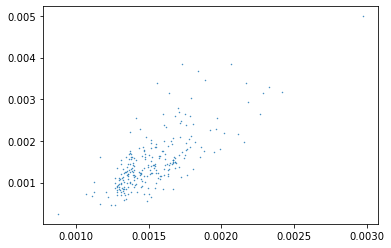

In [30]:
# plt.scatter(np.log((t_pred[t_test!=float("-inf")])), np.log(t_test[t_test!=float("-inf")]), s= .2)
plt.scatter(t_pred,t_test, s=.2)
# plt.ylim(-27,0)
# plt.xlim(0,0.000002)
# plt.ylim(0, 0.0000015)

np.corrcoef(t_pred[(t_test!=float("-inf")) & (t_test!=float("NaN"))], t_test[(t_test!=float("-inf")) & (t_test!=float("NaN"))])
# cov = np.cov(t_pred[(t_test!=float("-inf")) & (t_test!=float("NaN"))], t_test[(t_test!=float("-inf")) & (t_test!=float("NaN"))])
# b = cov[0,1] / cov[0,0]
# a = np.nanmean(t_test[(t_test!=float("-inf")) & (t_test!=float("NaN"))] - np.nanmean(t_pred[(t_test!=float("-inf")) & (t_test!=float("NaN"))]) * b)
# print(f"y = {a} + {b} x")
# def lin(x):
    # return a + b * x

# plt.scatter(t_pred[(t_test!=float("-inf")) & (t_test!=float("NaN"))], lin(t_pred[(t_test!=float("-inf")) & (t_test!=float("NaN"))]), color = 'r', s = .2)
# plt.show()

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/axes/_base.py:2141: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


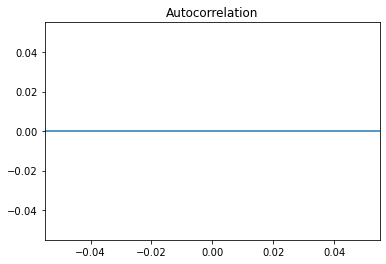

In [29]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(t_pred - t_test)
plt.show()

In [103]:
np.sqrt(t_pred.mean()), np.mean(np.sqrt(t_pred)), targets.min(), targets.max(), targets.median(), t_pred.min(), t_pred.max()

(0.00011170265441371223,
 0.0001086692883887459,
 0.0,
 2.4490847202669537e-05,
 0.0,
 6.604467850639068e-09,
 1.9499068309496824e-07)

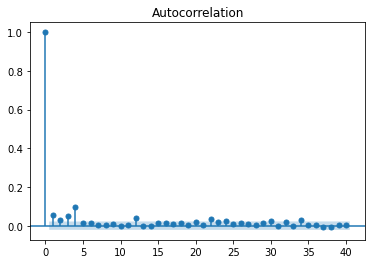

In [96]:
plot_acf(t_test)
plt.show()

In [23]:
len(features.columns)

85

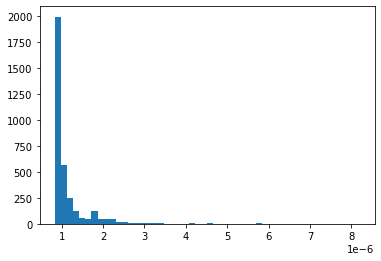

In [24]:
plt.hist(t_pred, bins = 50)
plt.show()

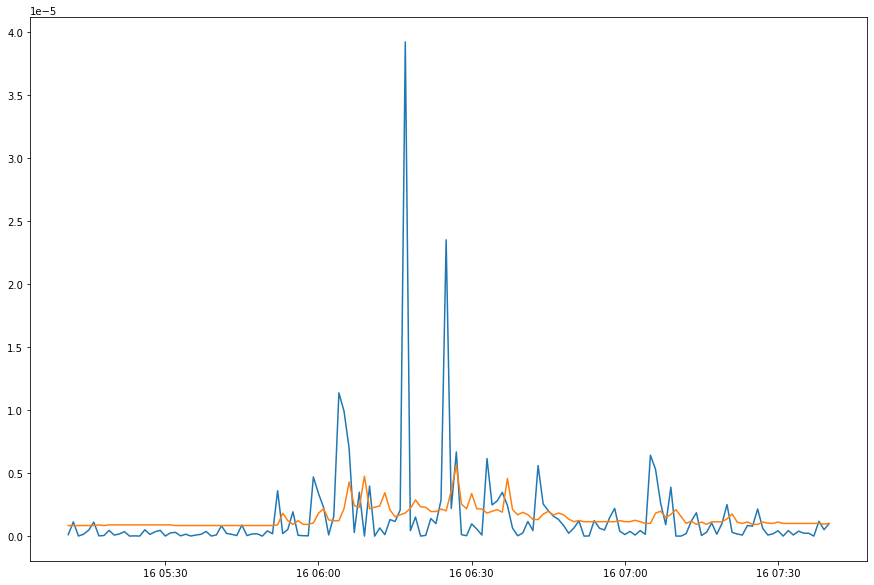

In [25]:
fig, ax  = plt.subplots(1,1, figsize = (15,10))
t_start = 50
t_end = 200
ax.plot(t_test.iloc[t_start:t_end])
ax.plot(t_test.iloc[t_start:t_end].index, t_pred[t_start:t_end])

plt.show()

In [114]:
features

,"1_('rwap', 'nansum')","1_('rwap', 'nanstd')","1_('rwap2', 'nansum')","1_('rwap2', 'nanstd')","1_('rwap3', 'nansum')","1_('rwap3', 'nanstd')","1_('rwap4', 'nansum')","1_('rwap4', 'nanstd')","1_('wap', 'series_realized_volatility')","1_('wap', 'series_realized_absolute_vol')",...,"4_('rwap4', 'nansum')","4_('rwap4', 'nanstd')","4_('wap', 'series_realized_volatility')","4_('wap', 'series_realized_absolute_vol')","4_('wap2', 'series_realized_volatility')","4_('wap2', 'series_realized_absolute_vol')","4_('wap3', 'series_realized_volatility')","4_('wap3', 'series_realized_absolute_vol')","4_('wap4', 'series_realized_volatility')","4_('wap4', 'series_realized_absolute_vol')"
timestamp,,,,,,,,,,,,,,,,,,,,,
2022-08-02 19:18:14,-0.990999,1.884470,-0.226509,1.585828,-1.415189,1.301462,1.153512,1.634666,18.747876,84.982977,...,NaN,NaN,23.819757,128.002132,15.859790,105.778115,16.681073,116.879262,19.888457,137.368498
2022-08-02 19:18:15,-0.107947,1.885101,0.768087,1.583431,-0.590275,1.314339,0.148246,1.638518,18.756485,85.516131,...,-0.801262,2.001371,24.234241,132.396795,15.860073,105.872852,16.647070,115.903952,19.887951,137.358478
2022-08-02 19:18:16,-2.119192,1.896176,-0.341237,1.579922,-0.857617,1.314208,0.762348,1.639490,18.867162,87.396298,...,-0.757215,2.001153,24.625179,136.718346,16.450168,110.239328,16.695334,116.618202,19.900356,137.661786
2022-08-02 19:18:17,-5.320280,1.919835,-1.400090,1.584785,-0.578077,1.314706,-0.412340,1.628863,19.109353,90.350120,...,-6.195382,2.055916,24.245790,133.002718,16.625693,111.879569,16.617282,115.149217,20.457921,141.881425
2022-08-02 19:18:18,0.056931,1.992988,-4.544793,1.604674,-0.217355,1.310874,-2.208074,1.637368,19.829954,95.616996,...,-2.860748,2.074770,23.853196,129.113172,16.625834,111.895193,16.668708,116.442272,20.266749,140.722101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-03 16:55:52,-0.691000,2.274134,-7.398153,1.590593,0.119738,1.426264,1.834261,1.105998,22.625567,145.019755,...,0.568432,0.771926,9.215563,44.680249,5.322948,28.092378,5.730910,31.769930,7.616526,52.007152
2022-08-03 16:55:53,0.209765,2.274778,0.599475,1.765966,1.046518,1.426268,-1.630811,1.094961,22.630033,145.217879,...,2.030096,0.766676,9.216427,44.805300,5.272332,27.439737,5.701548,31.522512,7.559698,51.436472
2022-08-03 16:55:54,-2.014922,2.289687,-1.373498,1.761539,1.323139,1.424627,0.079135,1.109366,22.753547,146.695523,...,-0.245635,0.769843,9.262215,45.724181,5.371792,28.421019,5.866857,32.848095,7.606574,51.769170


<AxesSubplot:>

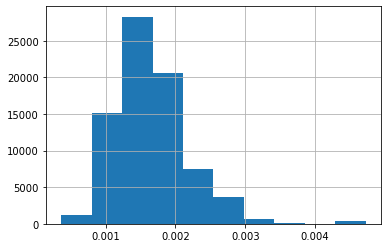

In [117]:
targets.hist()